In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
# mnistをDL
mnist = fetch_mldata("MNIST original", data_home="./data")

(70000L, 784L)


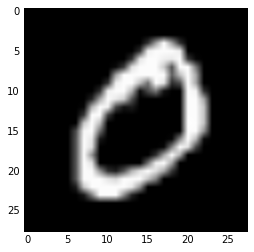

In [3]:
# データをロード
x = mnist.data
y = mnist.target
x = x.astype(np.float32)
y = y.astype(np.int32)

# 内容を確認
print x.shape # (700000, 784) => 28x28(784)の画像が70000枚
plt.imshow(x[0].reshape((28,28)), cmap=plt.cm.gray) # (28, 28)に変換してグレースケールで表示
plt.show()

In [4]:
# 輝度を揃える
x /= x.max()

In [5]:
#データを「学習データ:テストデータ=9:1」に分ける
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [15]:
model = RandomForestClassifier(n_estimators=50)
model = model.fit(x_train, y_train)

In [16]:
y_pred = model.predict(x_test)

In [17]:
category_dict = dict([(x, str(x)) for x in range(10)])

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(category_dict))
    plt.xticks(tick_marks, category_dict, rotation=45)
    plt.yticks(tick_marks, category_dict)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[674   0   0   0   1   1   3   0   3   2]
 [  0 768   3   3   0   1   2   1   1   0]
 [  4   1 662   2   2   0   4   3   5   0]
 [  0   0  11 688   0   4   1   4  12   4]
 [  2   1   2   0 667   0   3   2   1  11]
 [  0   0   2  12   3 619   4   1   5   1]
 [  2   2   1   0   2   3 666   0   2   0]
 [  0   1   5   2   3   0   0 698   2  11]
 [  1   3   3   0   7   3   1   0 644   4]
 [  2   2   4   8  10   3   0  11   4 684]]


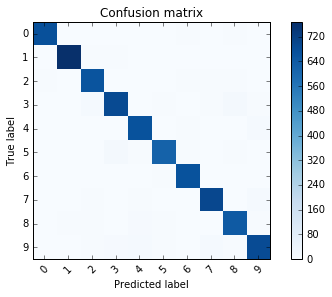

In [18]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)